          Load       A       B       C       D       E       F
kv     905.454  55.528  30.941  29.288  37.976  11.828  27.921
peb    402.095  39.848  28.314  27.548  37.695   5.538  22.634
rocks  322.210  62.852  39.390  38.596  41.798  15.590  33.179
level  134.078  50.455  31.434  28.780  29.743  16.322  26.853


Text(0, 0.5, 'Throughput (Kops/s)')

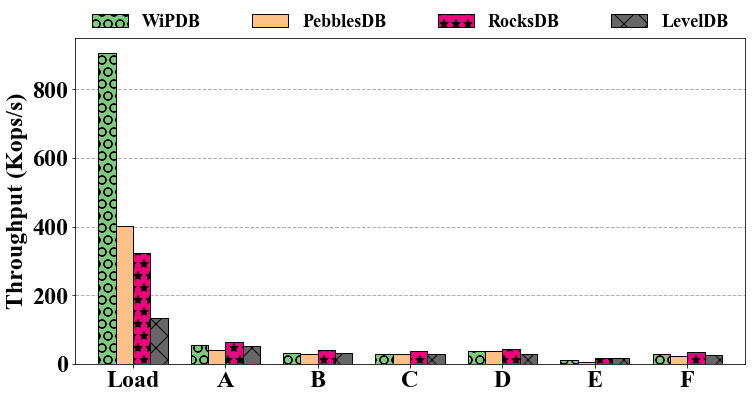

In [7]:
# libraries
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from operator import truediv
from matplotlib.pyplot import figure
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter

from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
import matplotlib.pyplot as plt

%matplotlib inline

ax = plt.figure(figsize=(12, 6)).add_subplot(111)

# Create the pandas DataFrame 
kv = pd.DataFrame(columns     = ['Load', 'A', 'B', 'C', 'D', 'E', 'F']) 
kv_hash = pd.DataFrame(columns= ['Load', 'A', 'B', 'C', 'D', 'E', 'F']) 
peb = pd.DataFrame(columns    = ['Load', 'A', 'B', 'C', 'D', 'E', 'F']) 
rocks = pd.DataFrame(columns  = ['Load', 'A', 'B', 'C', 'D', 'E', 'F']) 
level = pd.DataFrame(columns  = ['Load', 'A', 'B', 'C', 'D', 'E', 'F']) 
result = pd.DataFrame(columns = ['Load', 'A', 'B', 'C', 'D', 'E', 'F']) 

def ExtractResult(file):
    res = [0,0,0,0,0,0,0]
    with open(file) as origin_file:
        for line in origin_file:
            if line.startswith("ycsba"):
                tmp = line.split();
                res[1] = int(tmp[4])
            elif line.startswith("ycsbb"):
                tmp = line.split();
                res[2] = int(tmp[4])
            elif line.startswith("ycsbc"):
                tmp = line.split();
                res[3] = int(tmp[4])
            elif line.startswith("ycsbd"):
                tmp = line.split();
                res[4] = int(tmp[4])
            elif line.startswith("ycsbe"):
                tmp = line.split();
                res[5] = int(tmp[4])
            elif line.startswith("ycsbf"):
                tmp = line.split();
                res[6] = int(tmp[4])
            elif line.startswith("load"):
                tmp = line.split();
                res[0] = int(tmp[4])
    return res

folder = "./";
for file in os.listdir(folder):
        if (file.startswith('kv_ycsb')):
            kv.loc[len(kv)] = ExtractResult(file)
        elif file.startswith('peb_ycsb'):
            peb.loc[len(peb)] = ExtractResult(file)
        elif file.startswith('rocks_ycsb'):
            rocks.loc[len(rocks)] = ExtractResult(file)
        elif file.startswith('level_ycsb'):
            level.loc[len(level)] = ExtractResult(file)
        

result.loc['kv'] = kv.sum()
result.loc['peb'] = peb.sum()
result.loc['rocks'] = rocks.sum()
result.loc['level'] = level.sum()

raw = result.copy()

result = result/1000.0

print(result)
resultT = result.T
resultT.plot(ax=ax, kind="bar", fontsize=24, rot=0, colormap='Accent', width=0.75, edgecolor='k')

bars = ax.patches
hatches = ''.join(h*len(resultT) for h in 'O *x')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)


ax.legend(["WiPDB", "PebblesDB", "RocksDB", "LevelDB"], loc="upper right", fontsize=18, 
          edgecolor='k',facecolor='w', framealpha=0, mode="expand", ncol=4, bbox_to_anchor=(0., 1.02, 1., .102))

ax.yaxis.grid(linewidth=1, linestyle='--')
ax.set_axisbelow(True)


plt.ylabel('Throughput (Kops/s)', fontsize=24)



Load    905.454
A        55.528
B        30.941
C        29.288
D        37.976
E        11.828
F        27.921
Name: kv, dtype: float64
Load    134.078
A        50.455
B        31.434
C        28.780
D        29.743
E        16.322
F        26.853
Name: level, dtype: float64
[134.078, 50.455, 31.434, 28.78, 29.743, 16.322, 26.853]


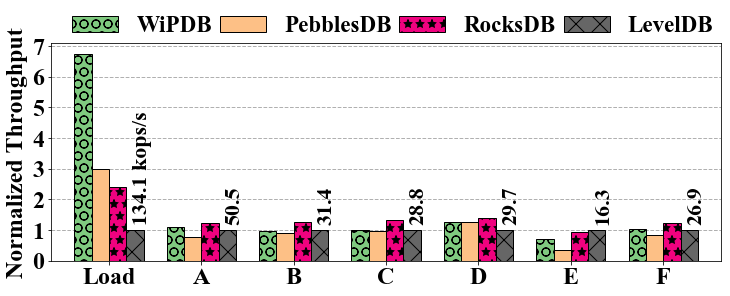

In [17]:
ax = plt.figure(figsize=(12, 4)).add_subplot(111)

pick_standard = 3
normalized = result.copy()
# print(normalized)
print(normalized.loc['kv'])
print(result.iloc[pick_standard])
normalized.loc['kv'] = normalized.loc['kv'] / result.iloc[pick_standard]
normalized.loc['level'] = normalized.loc['level'] / result.iloc[pick_standard]
normalized.loc['peb'] = normalized.loc['peb'] / result.iloc[pick_standard]
normalized.loc['rocks'] = normalized.loc['rocks'] / result.iloc[pick_standard]
normalized = normalized.T

normalized.plot(ax=ax, kind="bar", fontsize=24, rot=0, colormap='Accent', width=0.75, edgecolor='k')


bars = ax.patches
hatches = ''.join(h*len(normalized) for h in 'O *x')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)


# # set individual bar lables using above list
# for i in ax.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+.04, i.get_height()+8, \
#             str(round((i.get_height()), 1)), fontsize=11, color='k',
#                 rotation=90, horizontalalignment='left', verticalalignment='top')
    

ax.legend(["WiPDB", "PebblesDB", "RocksDB", "LevelDB"], loc="upper right", fontsize=23, 
          edgecolor='k',facecolor='w', framealpha=0, mode="expand", ncol=4, bbox_to_anchor=(0, 1.12, 1.02, .101))

ax.yaxis.grid(linewidth=1, linestyle='--')
ax.set_axisbelow(True)
ax.set_ylabel('Normalized Throughput', fontsize=24)


def add_value_labels(ax, spacing, labels, pick_standard):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    i = 0
    j = 0
    interval = len(labels)
    # For each bar: Place a label
    unit = False
    for rect in ax.patches:
        if i >= pick_standard * interval and i < (pick_standard+1) * interval:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height() + 0.05
            x_value = rect.get_x() + rect.get_width() / 2 + 0.08

            # Number of points between bar and label. Change to your liking.
            space = spacing
            # Vertical alignment for positive values
            va = 'bottom'

            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'

            # Use Y value as label and format number with one decimal place
            label = "{:.1f}".format(labels[j])
            if not unit:
                label = label + " kops/s"
                unit = True
            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va, rotation=90, fontsize=22)                      # Vertically align label differently for
                                            # positive and negative values.
            j = j + 1
        i = i + 1


labels = (raw/1000.0).values.tolist()[pick_standard] 
print(labels)

# Call the function above. All the magic happens there.
add_value_labels(ax, 4, labels, pick_standard)


plt.savefig("ycsb1w4bg.pdf",dpi=600,bbox_inches='tight')